# Argonne Data Analysis Notebook

## About:

This script will open data from Argonne and display it. It will also perform averaging and save all the files to `$ARGONNE_ROOT/images`. You will need to set the `path` variable in the first cell to the correct img.dat directory for this to work.

## Use:

Run each cell in order by selecting the cell and using Shift-Enter. The last cell can be run repeatedly with different file numbers. If you want an actual average, as opposed to the norm-average, just un-comment the `avg = np.mean(...)` line (remove the `#`, and comment out the previous line (`avg = norm_avg(...)`)). Other compounds can be added by modifying the `compounds` dictionary. Just change the line from `compounds = {'sulfur':3, 'zinc':15}` to `compounds = {'sulfur':3, 'zinc':15, 'copper':14 }`, using the number from this list:

`{'Al': 0, 'Si': 1, 'P': 2, 'S': 3, 'Cl': 4, 'Ar': 5, 'K': 6, 'Ca': 7, 'Ti': 8, 'Cr': 9, 'Mn': 10, 'Fe': 11, 'Co': 12, 'Ni': 13, 'Cu': 14, 'Zn': 15, 'Pt_L': 16, 'Pb_M': 17, 's_i': 18, 's_e': 19, 's_a': 20, 'TFY': 21, 'Bkgnd': 22}`

In [12]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image

path = 'C:/Users/chemadmin/Documents/ARGONNE/img.dat' # change to the appropriate path

In [13]:
def view(n): # n is the file number, m is the channel
    os.chdir(path) 
    data_dict = defaultdict(list)
    compounds = {'sulfur':3, 'zinc':15} # you can add other compounds here if you want. The compounds are listed at the top of the file.
    
    for i in range(4):
        with h5py.File('2xfm_00%02d.h5%d' % (n, i),'r') as f:
            data=f['MAPS']
            fits=np.asarray(data['XRF_fits'])
            
        for key, value in compounds.items():
            data_dict[key].append(fits[value])
    
    for key in compounds.keys():
        image = data_dict[key]
        avg = norm_avg(image) # this normalizes the channels and averages them
        #avg = np.mean(np.dstack(image),axis=2) # this averages the channels without normalizing
        for i in range(4):
            print("%s %d: max: %f, min %f, avg %f" %(key, i, np.max(image[i]), np.min(image[i]), np.mean(image[i])), end='', flush=True)
            save(image[i], '00%02d - ' % n + key + '_%d' % i)
            plt.imshow(image[i])
            plt.show()
        print("average: max: %f, min: %f, avg: %f" %(np.max(avg), np.min(avg), np.mean(avg)), end='', flush=True)
        save(avg, '00%02d - ' % n + key + '_average')
        plt.imshow(avg)
        plt.show()

def save(image, name):
    if not os.path.exists('images'):
        os.makedirs('images')
    im = Image.fromarray(image).convert("L")
    im.save('images/' + name + ".png")
    
def norm_avg(image):
    avg = np.zeros_like(image[0])
    for i in range(4):
        avg += image[i] / np.mean(image[i])
    return avg / 4

sulfur 0: max: 756.959412, min 0.000000, avg 149.904680

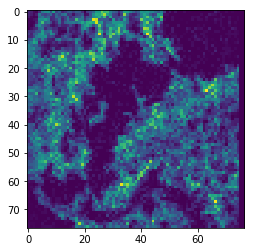

sulfur 1: max: 838.861938, min 0.000000, avg 156.174746

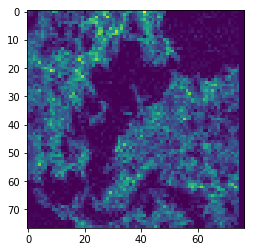

sulfur 2: max: 756.877930, min 0.000000, avg 133.836703

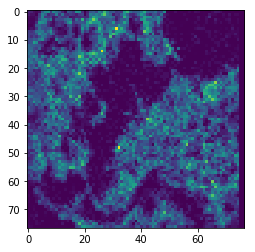

sulfur 3: max: 801.800598, min 0.000000, avg 122.110567

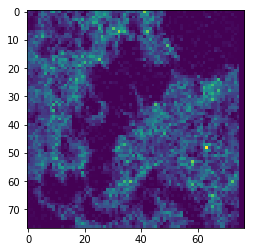

average: max: 4.167826, min: 0.000000, avg: 1.000000

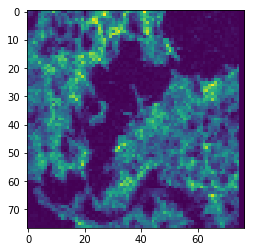

zinc 0: max: 709.242676, min 0.000000, avg 102.536737

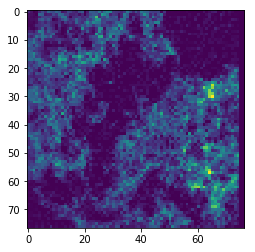

zinc 1: max: 785.804016, min 0.000000, avg 101.123976

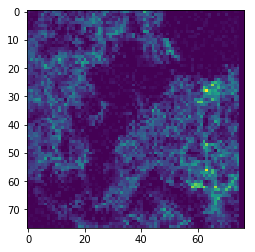

zinc 2: max: 456.729980, min 0.000000, avg 77.698490

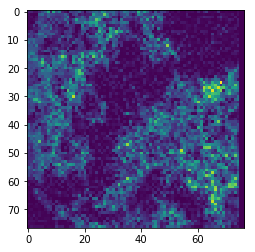

zinc 3: max: 642.214111, min 0.000000, avg 76.348008

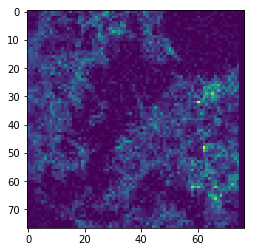

average: max: 5.790492, min: 0.000000, avg: 1.000000

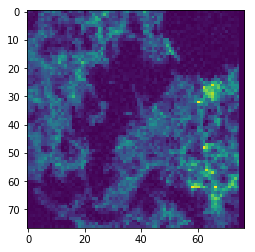

In [14]:
view(4) # n is the file number

## ImageJ Analysis

To use the ImageJ colocalization tools, download ImageJ from [here](https://imagej.net/Fiji/Downloads). Then run the program, generating the desidered images. Then open ImageJ and load the desired images (probably the average or channel 2 or 3) from both compounds. If only a particular ROI is to be considered, use one of the ImageJ selection tools (icons on the toolbar) to select a region in one of the two images - it shouldn't be too small. Then click Analyze/Colocalization/Coloc 2, and make sure the two corresponding images are selected as channel 1 and 2 (same channel from each compound). If an ROI is used, select which channel the ROI was drawn on (which is listed first in the dropdown menus above). Select the algorithms you want, and then click okay. This will generate a colocalization analysis which you can save as a PDF.

Details about the colocalization algorithms can be found [here](https://imagej.net/Colocalization_Analysis), [here](https://imagej.net/Coloc_2#How_to_use_Coloc_2), and [here](https://imagej.net/_images/3/31/Adler_et_al-2010-Cytometry_Part_A.pdf).